In [1]:
#importing packages


import numpy as np
import tensorflow as tf
import random as python_random

import pandas as pd 
import splitfolders
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import joblib
import os

from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.models import load_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, classification_report, precision_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras import metrics
from tensorflow.keras.wrappers import scikit_learn

from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'Data_Split/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=4280,
        color_mode='grayscale',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 3749 images belonging to 2 classes.


In [4]:
validation_generator = val_datagen.flow_from_directory('Data_Split/val',
                                                        target_size=(150, 150),
                                                        batch_size=978,
                                                        color_mode='grayscale',
                                                        class_mode='binary')
test_generator = test_datagen.flow_from_directory('Data_Split/test',
                                                  target_size=(150, 150),
                                                  batch_size=1173,
                                                  color_mode='grayscale',
                                                  class_mode='binary')

Found 936 images belonging to 2 classes.
Found 1107 images belonging to 2 classes.


In [5]:
#Creating the augumented data
aug_train_images = ImageDataGenerator(rotation_range=30, 
                                   width_shift_range=0.25, 
                                   height_shift_range=0.25, 
                                   shear_range=0.25, 
                                   zoom_range=0.25, 
                                   horizontal_flip=True,
                                   vertical_flip=True)

train_aug = aug_train_images.flow_from_directory('Data_Split/train',
                                                  target_size=(150, 150),
                                                  batch_size=3747,
                                                  color_mode='grayscale',
                                                  class_mode='binary')

Found 3749 images belonging to 2 classes.


In [6]:
#getting images and labels for models
train_data, train_labels = next (train_generator)
test_data, test_labels = next (test_generator)
val_data, val_labels = next (validation_generator)

In [7]:
# Function to show confusion matrix 
##from sklearn
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
cnn7_model = load_model('models/cnn7')

In [10]:
y_pred = (cnn7_model.predict(val_data) > 0.3).astype("int32")
cm = confusion_matrix(y_true= val_labels, y_pred=y_pred)  

30/30 [==============================] - 19s 607ms/step


Confusion matrix, without normalization
[[213  40]
 [  8 675]]


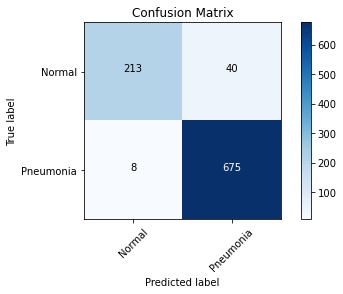

In [11]:
cm_labels = ['Normal','Pneumonia']
plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix');

In [ ]:
results = cnn7_model.evaluate(validation_generator)

In [ ]:
print(f"Model loss:  {results[0]}")
print(f"Model accuracy: {results[1]}")
print(f"Model precision: {results[2]}")
print(f"Model recall: {results[3]}")